## WeatherPy - Aalvarez

In [1]:
#Created on Sun Sep 4 07:12 2018
#@author: anthonyalvarez
#Test Files: WeatheyPy_00.ipynb - WeatheyPy_03.ipynb

### Referenced Material
 * https://bootcampspot-v2.com/sessions/472909/videos/25279
 * http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.set_value.html
 * https://stackoverflow.com/questions/5244810/python-appending-a-dictionary-to-a-list-i-see-a-pointer-like-behavior
 * https://stackoverflow.com/questions/5242933/what-was-the-motivation-for-doing-lists-augmented-assignment-in-place-in-py
 * https://stackoverflow.com/questions/4432208/how-does-work-in-python
 * https://python-reference.readthedocs.io/en/latest/docs/operators/modulus.html
 * https://stackoverflow.com/questions/43668827/python-modulo-function
 * https://stackoverflow.com/questions/44513738/pandas-create-empty-dataframe-with-only-column-names
 * https://www.tutorialspoint.com/python/string_title.htm
 * https://stackoverflow.com/questions/134934/display-number-with-leading-zeros
 * https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
 * https://matplotlib.org/examples/color/colormaps_reference.html
 * dates from the openweatherapi are stored as [dt] Time of data calculation, unix, UTC
 * https://openweathermap.org/current
 * https://stackoverflow.com/questions/46565580/convert-unix-timestamp-in-python-to-datetime-and-make-2-hours-behind
 * https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib

## Requirements

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

---
### Data Sources ![Data Sources Used](images/owm_01.png "OpenWeather")

* [OpenWeather](https://openweathermap.org/api) Clinical Data including Time, Size and Metastatic Sites


---
### Data Visualizations

<a href="images/latitude_vs_temperature_01.png" target="_blank">Latitude Vs. Temperature (F)</a>
<img src="images/latitude_vs_temperature_01.png" alt="Lat V Temp" height="600" width="400">

<a href="images/latitude_vs_humidity_02.png" target="_blank">Latitude Vs. Humidity (%)</a>
<img src="images/latitude_vs_humidity_02.png" alt="Lat V Humidity" height="600" width="400">

<a href="images/latitude_vs_clouds_03.png" target="_blank">Latitude Vs. Cloudiness (%)</a>
<img src="images/latitude_vs_clouds_03.png" alt="Lat V Clouds" height="600" width="400">

<a href="images/latitude_vs_winds_04.png" target="_blank">Latitude Vs. Wind Speed (MPH)</a>
<img src="images/latitude_vs_winds_04.png" alt="Lat V Wind" height="600" width="400">

---
### Data Output ![Data Sources Used](images/excelcsv.png "Excel Csv")
* [Output Data](data/city_weather.csv) Output data from API used for visualizations
* Supporting JSON files (for max temperatures run at different times of the day)
    * [JSON API 1](data/PAITA_PE_weather_001.json) Output data from API json
    * [JSON API 2](data/PAITA_PE_weather_001.json) Output data from API json
    * [JSON API 3](data/PAITA_PE_weather_001.json) Output data from API json
    

---
### Observable Trends

 * Immediately one can tell that there may be an issue in how openweather api interprets the max temperature. I have ran it several times and with each subsequent page the max temp changes by several degrees in either direction. Often times, temp, max temp and min temp have the exact same value as show below. This flaw then leads to the plots being, scattered with misleading results.
  * "main": {
  * "temp": 62.6,
  * "pressure": 1012,
  * "humidity": 290,
  * "temp_min": 62.6,
  * "temp_max": 62.6
  * etc....


 * There does not appear to be a relation between wind speed or the amount of cloudiness and latitude.


 * Also worth noting, is that possibly due to the first observation, humidity doesnt appear to be affected by latitude.
 

___
### Obeservable Trend Anomaly and Evidence
 * Shown in the humidity plot, there is a huge 1 off for humidity. Apparently there seem to be some cities in Peru, where humidity spikes (or the data implies there are spikes) during the day to levels of almost 300% humidity. Substatiating evidence is show in the Json file from openweathermap.org below. Further research is required to validate.

In [ ]:
## For PAITA - PE
{
"coord": {
"lon": -81.11,
"lat": -5.09
},
"weather": [
{
"id": 800,
"main": "Clear",
"description": "clear sky",
"icon": "01d"
}
],
"base": "stations",
"main": {
"temp": 62.6,
"pressure": 1012,
"humidity": 290,
"temp_min": 62.6,
"temp_max": 62.6
},
"visibility": 10000,
"wind": {
"speed": 12.75,
"deg": 240
},
"clouds": {
"all": 0
},
"dt": 1536267600,
"sys": {
"type": 1,
"id": 4411,
"message": 0.0044,
"country": "PE",
"sunrise": 1536232879,
"sunset": 1536276218
},
"id": 3694112,
"name": "Paita",
"cod": 200
}

---
## Dependencies

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from datetime import datetime, timedelta

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


---
## Functions

In [3]:
#function for time conversion
#https://stackoverflow.com/questions/46565580/convert-unix-timestamp-in-python-to-datetime-and-make-2-hours-behind
def unixtodate(unix_ts):
    #unix_ts = 1507126064
    dt = (datetime.fromtimestamp(unix_ts) - timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
    return dt

#created this to append the date to the file name later on
def datatofile(filepath, filename, texttoadd, fileext):
    output_file = filepath + filename + "_" + texttoadd + fileext
    return output_file
    

---
## File Operations

In [4]:
#image path
image_path = "images/"
image_name = ""
image_date = ""
image_extension = ".png"

# Output File (CSV)
file_path = "data/"
file_name = "city_weather"
file_date = ""
file_extension = ".csv"


---
## Functional Logic

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#add a list to view cities found nearby
citiesnearby = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#join the data for a workable use variable
lat_lngs = zip(lats, lngs)


In [6]:
#using the code to build a dataframe for lat/long visaid
#maybe create a dataframe with empty columns and then add to it?
#https://stackoverflow.com/questions/44513738/pandas-create-empty-dataframe-with-only-column-names

#bad syntax missing {}
#latlong_df = pd.DataFrame("Lat": lats, "Long": lngs)
latlong_df = pd.DataFrame({"Lat": lats, "Long": lngs})

#verify data
latlong_df.head()

,Lat,Long
0,81.051101,-91.630377
1,20.791187,50.057288
2,-34.698775,-171.612893
3,54.988460,140.248536
4,29.885608,46.192733


In [7]:

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #find the total amount of cities nearby because im curious
    citiesnearby.append(city)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        #print(city)
        cities.append(city)

# Print the city count to confirm sufficient count
#print(len(cities))
#print(len(citiesnearby))

num_cities_found = len(cities)
num_coordinates = len(citiesnearby)

print(f'Using {num_coordinates} coordinates, found {num_cities_found} citie(s)')


Using 1500 coordinates, found 607 citie(s)


In [8]:
#view the collected output
cities_df = pd.DataFrame({"Cities":cities})
cities_df.head()

,Cities
0,qaanaaq
1,abu samrah
2,vaini
3,mnogovershinnyy
4,doha


In [9]:
#configure the base url to be used
baseurl = "http://api.openweathermap.org/data/2.5/weather?"

#we dont want celsius
#units = "metric"

#we do want to use farenheit
units = "imperial"

# Build partial query URL
query_url = f"{baseurl}appid={api_key}&units={units}&q="

#print to view/verify our working url
#print(query_url)

---
### Main Data Fetch

In [10]:

#used for testing only --------->
#track the unique responses, found 2 [200, 404]
#responsetypes = [] 
#<-------------------------------

#set up a counter
counter = 0

#set up a variable to break a certain # of times out of the loop(for testing)
numbreak = 15

#count cities added
citiesadded = 0

#set up a grouping or modulus group using %
modnum = 50

#set the counter for the group starting at Group 1
modgroup = 1

#use a dictionary object to capture info
#weathercities = {"city":,"country":}

#PROBLEMS!!! = [(face2desk)for problem in pythonproblems] :)

#dictionary object not working using list instead
weathercities = []


print('-----------------------------')
print(f'Begin Processing from {len(cities)} Cities. {numbreak} Attempts')
print('-----------------------------')


#loop through the dataframe
for index, row in cities_df.iterrows():
    
    #grab the city into a variable
    #print(row["Cities"])
    thecity = row["Cities"]
    
    #add the city into the base url 
    city_url = query_url + thecity
    #print(city_url)
    
    #get data from the api call
    city_response = requests.get(city_url).json()
        

    ##This section for testing only ---------->
    ##checking for bad responses, only check to see if its possible to get have errors
    ##results are we found 2 different response types so we have to deal with them
    #responsetype = requests.get(city_url).status_code
    #if responsetype not in responsetypes:
    #    responsetypes.append(responsetype)
    ##<-----------------End testing reponse types
    
    #testing mod groups
    #if (index % 2 == 0):
        #modgroup +=1
    #<----end mod testing
        
    
    
    #if we find a response with 404 we need to skip it
    responsetype = requests.get(city_url).status_code
    #print(responsetype)
    
    #really only care about a good response
    if responsetype == 200:
        citiesadded += 1
        #print(responsetype)
        #print(city_response["id"])
        #print(city_response["sys"]["country"])
        city_id = city_response["id"]
        city_country = city_response["sys"]["country"]
        city_lat = city_response["coord"]["lon"]
        city_long = city_response["coord"]["lat"]
        city_name = city_response["name"]
        city_temp_max = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_clouds = city_response["clouds"]["all"]
        city_winds = city_response["wind"]["speed"]
        
        #use function to convert unix to datetime
        city_analysis_date = unixtodate(city_response["dt"])
        
        #make it so that the cities added Groupings are ONLY for cities added, 
        #and NOT for the entire list we are searching, this would give us inconsistencies in groups
        if (citiesadded % modnum ==0):
            modgroup +=1
        
        #print(f'ID:{city_id} Country:{city_country} City:{city_name}')
        
        #adding date of analysis
        weathercities.append({"cityid":city_id
                              ,"country":city_country
                              ,"city":city_name
                              ,"lat":city_lat
                              ,"long":city_long
                              ,"max temp":city_temp_max
                              ,"humidity":city_humidity
                              ,"cloudiness":city_clouds
                              ,"wind speed":city_winds
                              ,"groupingid":modgroup
                              ,"analysis date":city_analysis_date
                             })

        #print(f'Adding {counter} city{city_name} ModGroup# {modgroup}')
        #"{:10.4f}".format(x)
        #https://stackoverflow.com/questions/134934/display-number-with-leading-zeros
        print(f'{str(index).zfill(2)}: Add  {citiesadded} City: {thecity.title()} Group {modgroup}')
        
    else:
        #print(f'City:{thecity} Response:{responsetype}')
        print(f'{str(index).zfill(2)}: Skip ** City:{thecity.title()} not found.')
    
    #print(f'ModGroup# {modgroup}')
    
    
    #Begin testing break------>
    #testing for the first 5 records
    #if counter == numbreak:
    #    break
    #<-----------end testing
      
    #increment the counter
    counter+=1
        

  
    #display a final output of status
print('-----------------------------')
print('Data Retrieval Complete      \n')


-----------------------------
Begin Processing from 607 Cities. 15 Attempts
-----------------------------
00: Add  1 City: Qaanaaq Group 1
01: Add  2 City: Abu Samrah Group 1
02: Add  3 City: Vaini Group 1
03: Add  4 City: Mnogovershinnyy Group 1
04: Add  5 City: Doha Group 1
05: Add  6 City: Mar Del Plata Group 1
06: Skip ** City:Illoqqortoormiut not found.
07: Add  7 City: Svetlogorsk Group 1
08: Skip ** City:Barentsburg not found.
09: Add  8 City: Hermanus Group 1
10: Skip ** City:Korla not found.
11: Add  9 City: Puerto Ayora Group 1
12: Add  10 City: Tuktoyaktuk Group 1
13: Add  11 City: Vila Franca Do Campo Group 1
14: Add  12 City: Cape Town Group 1
15: Add  13 City: Sovetskaya Gavan Group 1
16: Add  14 City: Flin Flon Group 1
17: Add  15 City: Punta Arenas Group 1
18: Add  16 City: Gold Coast Group 1
19: Add  17 City: Lasa Group 1
20: Add  18 City: Tiksi Group 1
21: Add  19 City: Taoudenni Group 1
22: Add  20 City: Ayorou Group 1
23: Skip ** City:Taolanaro not found.
24: Add  2

222: Add  198 City: Cockenzie Group 4
223: Add  199 City: Taywarah Group 4
224: Add  200 City: Quatre Cocos Group 5
225: Add  201 City: East London Group 5
226: Add  202 City: Thompson Group 5
227: Add  203 City: Raton Group 5
228: Add  204 City: Talnakh Group 5
229: Add  205 City: Anadyr Group 5
230: Add  206 City: Karratha Group 5
231: Add  207 City: Norrtalje Group 5
232: Add  208 City: Sao Filipe Group 5
233: Add  209 City: Tautira Group 5
234: Add  210 City: Nishihara Group 5
235: Add  211 City: Zyryanka Group 5
236: Add  212 City: Caravelas Group 5
237: Add  213 City: Severo-Kurilsk Group 5
238: Add  214 City: Sao Jose Da Coroa Grande Group 5
239: Add  215 City: Banda Aceh Group 5
240: Add  216 City: Ahuimanu Group 5
241: Add  217 City: Alpena Group 5
242: Skip ** City:Grand River South East not found.
243: Add  218 City: Ilhabela Group 5
244: Add  219 City: Honiara Group 5
245: Add  220 City: Cabo San Lucas Group 5
246: Add  221 City: Codrington Group 5
247: Add  222 City: La Ro

440: Add  395 City: Novyy Urengoy Group 8
441: Add  396 City: Lahij Group 8
442: Add  397 City: Boffa Group 8
443: Add  398 City: Mezen Group 8
444: Add  399 City: Oranjemund Group 8
445: Add  400 City: Kidal Group 9
446: Add  401 City: Cherskiy Group 9
447: Add  402 City: Barra Patuca Group 9
448: Add  403 City: Luderitz Group 9
449: Skip ** City:Malakal not found.
450: Add  404 City: Koltubanovskiy Group 9
451: Add  405 City: Arlit Group 9
452: Add  406 City: Sorong Group 9
453: Add  407 City: Henties Bay Group 9
454: Add  408 City: Marzuq Group 9
455: Add  409 City: South Shields Group 9
456: Add  410 City: Lorengau Group 9
457: Skip ** City:Stoyba not found.
458: Add  411 City: Turukhansk Group 9
459: Add  412 City: Nabire Group 9
460: Add  413 City: Constitucion Group 9
461: Add  414 City: Mobaye Group 9
462: Add  415 City: Mitsamiouli Group 9
463: Add  416 City: Banka Group 9
464: Add  417 City: Port Blair Group 9
465: Add  418 City: Batsfjord Group 9
466: Add  419 City: Sao Seba

## Data Retrieval Summary

In [11]:
#display a nice summary for a more detailed analysis
#we could even output the combined data from above together with this summary
#to a text file
print('********SUMMARY**************')
print(f'Using {num_coordinates} coordinates, found {num_cities_found} citie(s).')
print(f'Created {modgroup} group(s) from a total of {len(weathercities)} citie(s).')
print('-----------------------------')

********SUMMARY**************
Using 1500 coordinates, found 607 citie(s).
Created 11 group(s) from a total of 539 citie(s).
-----------------------------


In [12]:
#create a workable dataframe to house api data
weather_cities_df = pd.DataFrame(weathercities)
#view the columns/data
weather_cities_df.head()

,analysis date,city,cityid,cloudiness,country,groupingid,humidity,lat,long,max temp,wind speed
0,2018-09-06 12:39:25,Qaanaaq,3831208,68,GL,1,100,-69.36,77.48,32.25,3.65
1,2018-09-06 12:39:26,Abu Samrah,172515,0,SY,1,74,37.18,35.30,71.58,10.25
2,2018-09-06 12:39:26,Vaini,1273574,100,IN,1,99,74.49,15.34,69.87,4.43
3,2018-09-06 12:39:27,Mnogovershinnyy,2019935,76,RU,1,85,139.92,53.94,51.24,4.76
4,2018-09-06 12:00:00,Doha,290030,0,QA,1,79,51.53,25.29,91.40,4.70


In [13]:
#check for consistent values
print(weather_cities_df.count())


analysis date    539
city             539
cityid           539
cloudiness       539
country          539
groupingid       539
humidity         539
lat              539
long             539
max temp         539
wind speed       539
dtype: int64


## Data Output

In [14]:
#Attempt to get the date for use in charts, titles, etc...

#SOOO many issues trying to obtain a proper date formats im not even going to 
#comment on my struggle here, noted the references in its corresponding location

#get the max analysis date and use for plot titles etc.
analysisdate = weather_cities_df["analysis date"].max()

#split the date because we dont want the time
analysisdate = analysisdate.split(" ")

#get the hyphenated date for appending to file name
file_date = analysisdate[0]
print(file_date)

#use the date part of the date
analysisdate = analysisdate[0]
#https://stackoverflow.com/questions/14524322/how-to-convert-a-date-string-to-different-format
#print(analysisdate)

#format to a nicer looking string to add to titles
analysisdate = datetime.strptime(analysisdate, '%Y-%m-%d').strftime('%m/%d/%y')
print(analysisdate)

2018-09-06
09/06/18


In [17]:
#append the date to the file name
fileoutput = datatofile(file_path, file_name, file_date, file_extension)
print(fileoutput)

#export the dataframe to csv
weather_cities_df.to_csv(fileoutput)

data/city_weather_2018-09-06.csv


## Plotting Logic

In [52]:
#set up variables from the dataframe

#x plot lattitudes
xplot_lats = weather_cities_df["lat"]


#temperatures
yplot_temp = weather_cities_df["max temp"]

#humidities
yplot_humid = weather_cities_df["humidity"]

#cloudiness
yplot_clouds = weather_cities_df["cloudiness"]

#wind speeds
yplot_winds = weather_cities_df["wind speed"]


#used for dynamic titles..
begintitle = "City Latitude vs. "
endtitle =  " as of " + analysisdate

#leaving these empty for now so i dont lose my mind
current_title = ""
current_x_title = ""
current_y_title = ""

ymarker = "o"
x_label = "Cities"



## Temperature (f) vs. Latitude

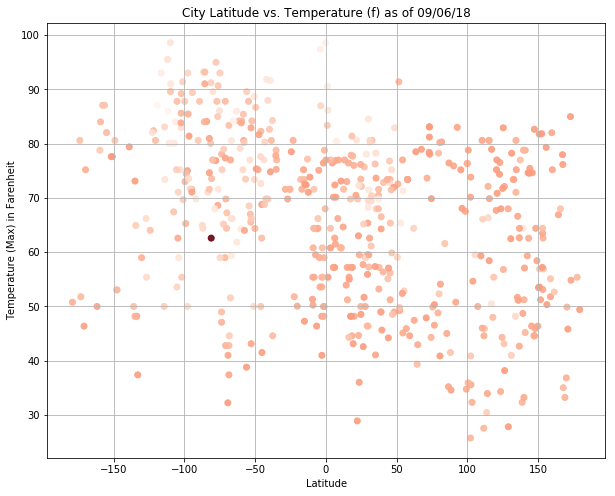

In [53]:
#Temperature (f) vs. Latitude

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
current_title = begintitle + "Temperature (f)" + endtitle
current_x_title = "Latitude"
current_y_title = "Temperature (Max) in Farenheit"

plt.figure(figsize=(10,8))

plt.scatter(xplot_lats, yplot_temp
            ,label=x_label, marker=ymarker
            ,alpha=.9
            ,c=yplot_humid,cmap="Reds")

plt.title(current_title)
plt.xlabel(current_x_title)
plt.ylabel(current_y_title)
plt.grid()

#save the image
image_name = "latitude_vs_temperature"
#append a number to the file name
imageoutput = datatofile(image_path, image_name, "01", image_extension)
plt.savefig(imageoutput)
#print(imageoutput)

plt.show()


---
## Latitude vs. Humidity

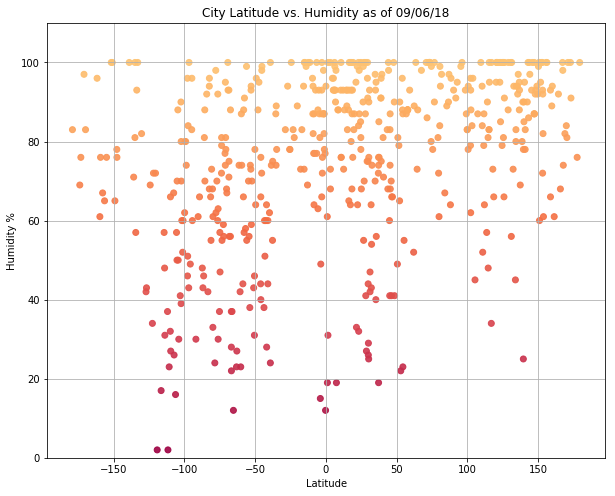

In [42]:
#Humidity (f) vs. Latitude
current_title = begintitle + "Humidity" + endtitle
#current_x_title = "Latitude"
current_y_title = "Humidity %"

plt.figure(figsize=(10,8))

#https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
#https://matplotlib.org/examples/color/colormaps_reference.html
plt.scatter(xplot_lats, yplot_humid
            ,label=x_label, marker=ymarker
            ,alpha=.9
            ,c=yplot_humid,cmap="Spectral")

plt.title(current_title)
plt.xlabel(current_x_title)
plt.ylabel(current_y_title)



#deal with the anomaly, we have 1 value that is way too high for 
#the charts and thus throws off the graphing, will remove just for this chart
#PAITA - PE, PERU is showing "humidity": 290, so we will just use XLIM
plt.ylim(0,110)
#------------------------------------------------------------------------

plt.grid()

#save the image
image_name = "latitude_vs_humidity"
#append a number to the file name
imageoutput = datatofile(image_path, image_name, "02", image_extension)
plt.savefig(imageoutput)
#print(imageoutput)

plt.show()


## Latitude vs. Cloudiness

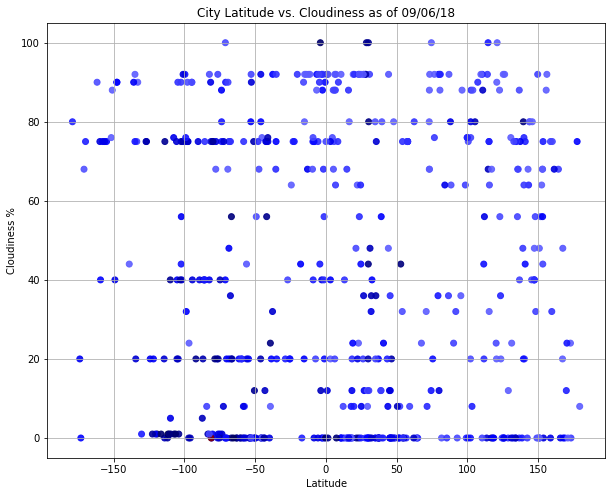

In [43]:
#Cloudiness vs. Latitude
current_title = begintitle + "Cloudiness" + endtitle
#current_x_title = "Latitude"
current_y_title = "Cloudiness %"

plt.figure(figsize=(10,8))

#https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
#https://matplotlib.org/examples/color/colormaps_reference.html
plt.scatter(xplot_lats, yplot_clouds
            ,label=x_label, marker=ymarker
            ,alpha=.9
            ,c=yplot_humid,cmap="seismic")

plt.title(current_title)
plt.xlabel(current_x_title)
plt.ylabel(current_y_title)
plt.grid()

#save the image
image_name = "latitude_vs_clouds"
#append a number to the file name
imageoutput = datatofile(image_path, image_name, "03", image_extension)
plt.savefig(imageoutput)
#print(imageoutput)

plt.show()


## Latitude vs. Wind Speed

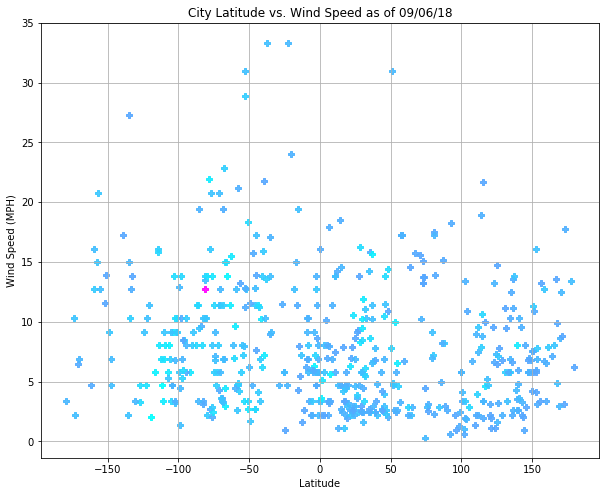

In [44]:
#Wind Speed vs. Latitude
current_title = begintitle + "Wind Speed" + endtitle
#current_x_title = "Latitude"
current_y_title = "Wind Speed (MPH)"

plt.figure(figsize=(10,8))

#https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
#https://matplotlib.org/examples/color/colormaps_reference.html
plt.scatter(xplot_lats, yplot_winds
            ,label=x_label, marker="P"
            ,alpha=.9
            ,c=yplot_humid,cmap="cool")

plt.title(current_title)
plt.xlabel(current_x_title)
plt.ylabel(current_y_title)
plt.grid()

#save the image
image_name = "latitude_vs_winds"
#append a number to the file name
imageoutput = datatofile(image_path, image_name, "04", image_extension)
plt.savefig(imageoutput)
#print(imageoutput)

plt.show()


---
## WeatherPy - Aalvarez

![Equator Sign](images/equatorsign.png "Equator")